### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.enable_eager_execution()
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 22s 5us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
trainX.shape

(60000, 28, 28)

In [8]:
len(trainY)

60000

In [9]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
testX.shape

(10000, 28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [11]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [12]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


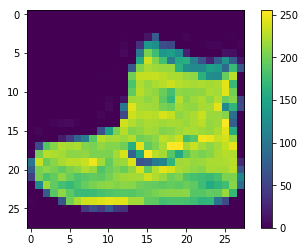

In [13]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [14]:
import matplotlib.pyplot as plt

In [15]:
#Coverting/scaling the values to range from 0 to 1
#trainX = trainX / 255.0
#testX = testX / 255.0

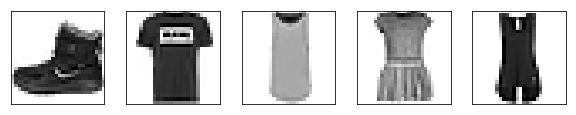

In [16]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [17]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 10
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))



In [18]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

### Execute the model using model.fit()

In [20]:
model.fit(trainX, trainY, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 6s 104us/sample - loss: 14.5052
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 14.5063
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 14.5063
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 14.5063
Epoch 5/10
60000/60000 [==============================] - 6s 103us/sample - loss: 14.5063
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 14.5063
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 14.5063
Epoch 8/10
60000/60000 [==============================] - 6s 92us/sample - loss: 14.5063
Epoch 9/10
60000/60000 [==============================] - 6s 100us/sample - loss: 14.5063
Epoch 10/10
60000/60000 [==============================] - 6s 92us/sample - loss: 14.5063


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [21]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 10
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [22]:
#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [23]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [24]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

### Execute the model

In [25]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.5533
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4833
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4709
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4607
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4536
Epoch 6/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4474
Epoch 7/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4445
Epoch 8/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4472
Epoch 9/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4430
Epoch 10/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4383


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [26]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

In [27]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4071
Epoch 2/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.4041
Epoch 3/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3988
Epoch 4/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4012
Epoch 5/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4012
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4016
Epoch 7/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3974
Epoch 8/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4012
Epoch 9/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3996
Epoch 10/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.40022s - ETA: 1s  - ETA: 1s - los - ETA: 0s - loss: 0. - ETA: 0s - los


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [28]:
#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 3rd hidden layer
model2.add(tf.keras.layers.Dense(10, activation='sigmoid'))


In [29]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [30]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

## Review model

In [31]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total para

### Run the model

In [32]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 173us/sample - loss: 2.3049
Epoch 2/10
60000/60000 [==============================] - 10s 160us/sample - loss: 2.2990
Epoch 3/10
60000/60000 [==============================] - 10s 162us/sample - loss: 2.2929
Epoch 4/10
60000/60000 [==============================] - 10s 160us/sample - loss: 2.2794
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 2.2302
Epoch 6/10
60000/60000 [==============================] - 10s 161us/sample - loss: 1.9054
Epoch 7/10
60000/60000 [==============================] - 9s 152us/sample - loss: 1.3242
Epoch 8/10
60000/60000 [==============================] - 9s 154us/sample - loss: 1.0175
Epoch 9/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.8800
Epoch 10/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.7711
